# Setup

In [9]:
import sys
sys.path.append('/home/arnisaf/mp-tl-study')
from functions.visualization_utils import *

## Load Data

In [44]:
# load baselines: filename!!
with open('results/baseliens_freeze_True_pool_True_random.json', 'r') as f:
    baselines = json.load(f)
baselines = baselines[1:]

# load results; filename
with open('results/results_freeze_True_pool_True_random.json', 'r') as f:
    results = json.load(f)

# Run this if the first element of the results is the PARAMS dict
params = results[0]
results = results[1:]
# if not, initialize a params dict -see 3. Init params

data_dicts = baselines + results 
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.7500,0.29875
1,0.001,0.001,-1,1,0.8125,0.33700
2,0.001,0.001,-1,2,0.5000,0.29075
3,0.001,0.001,-1,3,0.6250,0.38500
4,0.001,0.001,-1,4,0.3750,0.26900


In [45]:
# Filter the baselines to these percentages: 0.001, 0.01, 0.1, 0.5, 1.0
# because there are some extra percentages
baselines = [result for result in baselines if result["sampled_percentage"] in [0.001, 0.01, 0.1, 0.5, 1.0]]

results = [result for result in results if result["sampled_percentage"] in [0.001, 0.01, 0.1, 0.5, 1.0]]
data_dicts = baselines + results 
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.7500,0.29875
1,0.001,0.001,-1,1,0.8125,0.33700
2,0.001,0.001,-1,2,0.5000,0.29075
3,0.001,0.001,-1,3,0.6250,0.38500
4,0.001,0.001,-1,4,0.3750,0.26900


In [46]:
df_empirical = df.copy()

In [36]:
df_other = df.copy()

In [17]:
# unfortunately we are missing one row in the reverse direction, so to run comparison between the regular classes and reverse direction run this cell
df_empirical = df_empirical.drop(79)

In [33]:
# OR LOAD ARI Scores
"""with open("results_jsons/ari/ari_scores_finetuned_Fashion_to_MNIST.json", "r") as f:
    ari_scores_all = json.load(f)
df_ari = pd.DataFrame(ari_scores_all)

# Display the DataFrame (showing the first few rows for brevity)
df_ari.head()"""

# 1. The plots
See the documentation (mp-tl-study/example_visualizations.ipynb) for a full list of supported visualizations

### Experimental Plots

### First: df_empirical, main experiment, on the left

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if ther

     Percentage  Cut Point 1  Cut Point 2  statistic       p_value
0         0.001           -1            0        0.0  1.000000e+00
1         0.001           -1            1      147.0  6.915188e-01
2         0.001           -1            2       81.0  2.747941e-02
3         0.001           -1            3        2.0  1.788139e-07
4         0.001           -1            4        0.0  5.960464e-08
..          ...          ...          ...        ...           ...
135       1.000            3            5        0.0  6.250000e-02
136       1.000            3            6        0.0  6.250000e-02
137       1.000            4            5        0.0  6.250000e-02
138       1.000            4            6        0.0  6.250000e-02
139       1.000            5            6        0.0  6.250000e-02

[140 rows x 5 columns]
Freeze = True, Reinitialize = True, Pooling = True, Learning rate = 0.001


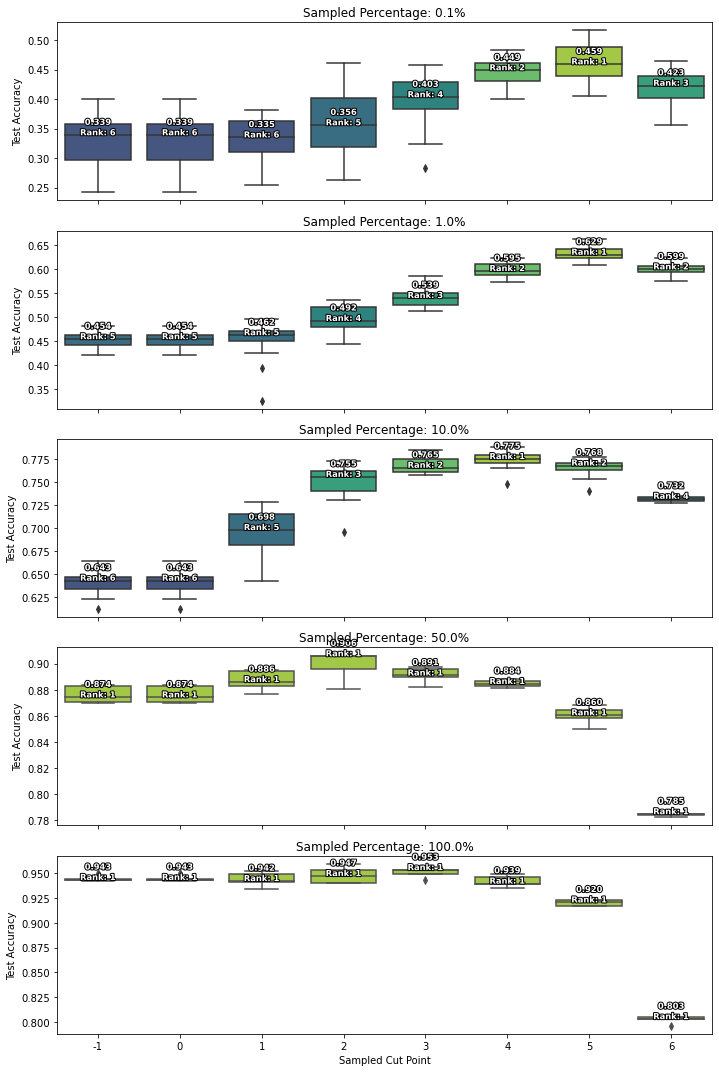

In [27]:
# run statistical tests below to get the df_rankings
_, df_rankings = get_rankings(df=df_empirical)
ranks_sorted = box_plot(df=df_empirical, rank_df=df_rankings, params=params)

### Then: df_other, to be compared, on the right

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Freeze = True, Reinitialize = True, Pooling = True, Learning rate = 0.001


<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

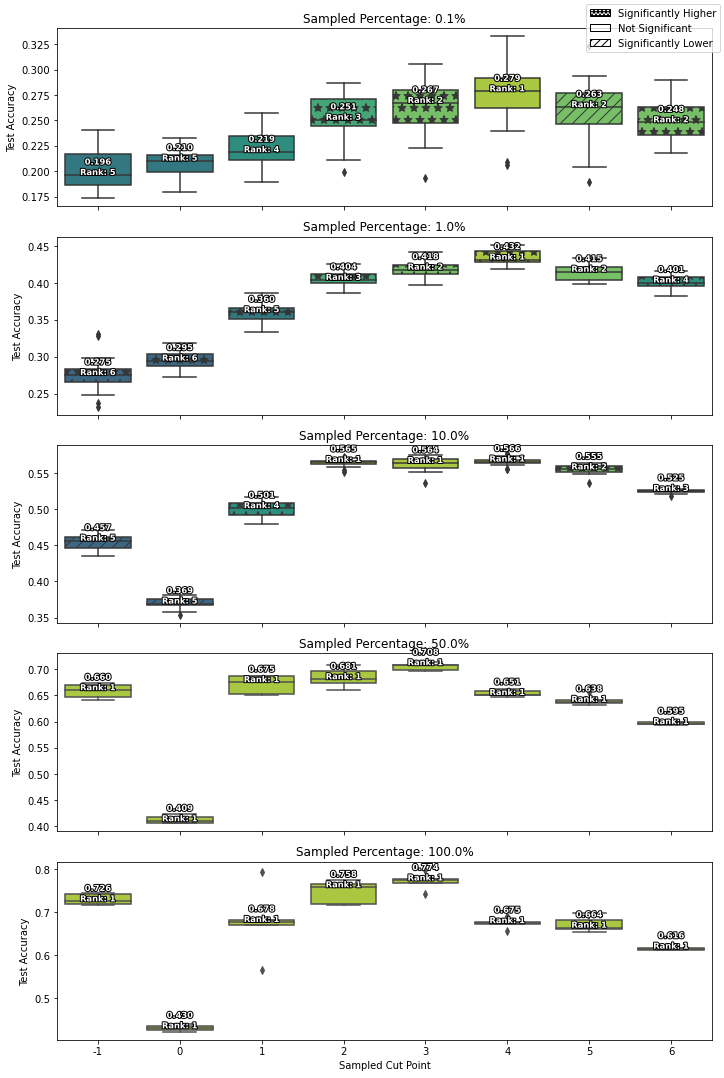

In [16]:
# run statistical tests below to get the df_rankings
_, df_rankings = get_rankings(df=df_other)
df_wilcoxon_pairwise = pairwise_comparison_multiple_plots(df_empirical, df_other)
stats_empirical = df_empirical.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_empirical = stats_empirical.reset_index()
stats_empirical.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)

stats_other = df_other.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_other = stats_other.reset_index()
stats_other.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)
# create df_rankings_empirical and df_rankings_truncated, where if one is significantly different from each other we compare the mean_test_acc of both, and the one which is bigger is ranked 1, the lower is rank 3, and if they are not significantly different they ar eboth rank 2

df_rankings_empirical = stats_empirical.copy()
df_rankings_other = stats_other.copy()

# in a for loop, compare the is_significant of two dataframes
for i in range(len(df_wilcoxon_pairwise)):
    if df_wilcoxon_pairwise.iloc[i]['is_significant']:
        if stats_empirical.iloc[i]['Mean Test Accuracy'] > df_rankings_other.iloc[i]['Mean Test Accuracy']:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 8
            df_rankings_other.loc[i, 'Mean Test Accuracy'] = 1
        else:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 1
            df_rankings_other.loc[i, 'Mean Test Accuracy'] = 8
    else:
        df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 5
        df_rankings_other.loc[i, 'Mean Test Accuracy'] = 5

df_rankings_empirical['rank'] = df_rankings_empirical['Mean Test Accuracy'].astype(int)
df_rankings_other['rank'] = df_rankings_other['Mean Test Accuracy'].astype(int)
box_plot(df=df_other, rank_df=df_rankings, params=params, pairwise_rank_df=df_rankings_other, pairwise=True, add_baseline=True)

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

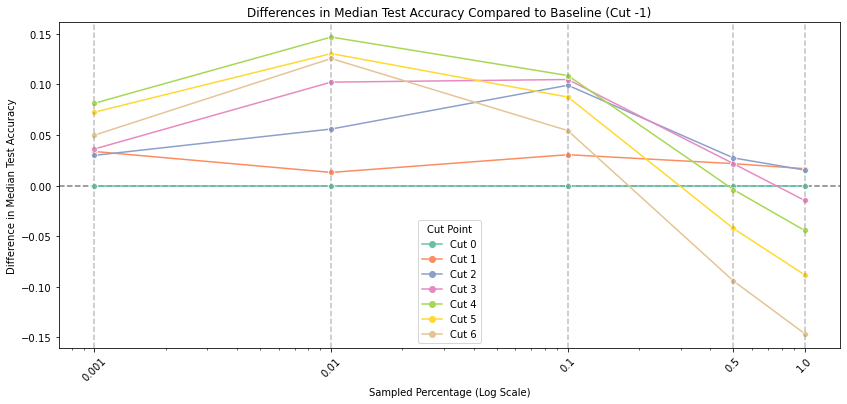

In [9]:
compare_to_baseline_line_plot(df)

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

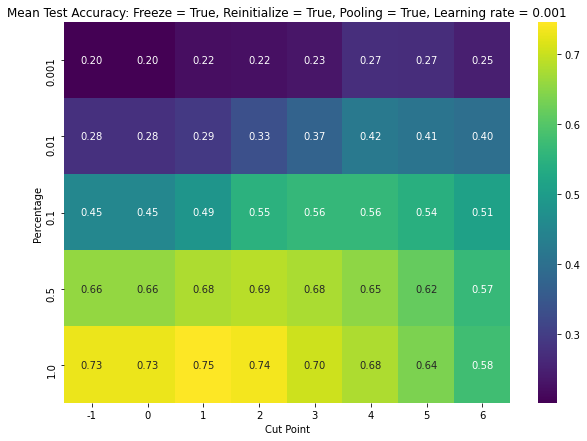

In [10]:
heatmap(df, params, figsize=(10,7))

# 2. Statistical Tests

### Tables for Pairwise comparing plots

In [42]:
# create df_rankings_empirical and df_rankings_truncated, where if one is significantly different from each other we compare the mean_test_acc of both, and the one which is bigger is ranked 1, the lower is rank 3, and if they are not significantly different they ar eboth rank 2
df_wilcoxon_pairwise = pairwise_comparison_multiple_plots(df_empirical, df_other)
stats_empirical = calculate_statistics(df_empirical)
stats_other = calculate_statistics(df_other)

df_rankings_empirical = stats_empirical.copy()
df_rankings_other = stats_other.copy()

# in a for loop, compare the is_significant of two dataframes
for i in range(len(df_wilcoxon_pairwise)):
    if df_wilcoxon_pairwise.iloc[i]['is_significant']:
        if stats_empirical.iloc[i]['Mean Test Accuracy'] > stats_other.iloc[i]['Mean Test Accuracy']:
            df_wilcoxon_pairwise.loc[i, "Higher"] = "truncate=False"
        else:
            df_wilcoxon_pairwise.loc[i, "Higher"] = "truncate=True"
        # print(df_wilcoxon_pairwise)
    else:
        df_wilcoxon_pairwise.loc[i, "Higher"] = "None"

# every row: is the percentage and cut significantly different between the two box plots
df_wilcoxon_pairwise["statistic"] = df_wilcoxon_pairwise["statistic"].astype(int)

latex_table = df_wilcoxon_pairwise.to_latex(index=False, float_format="%.6f")
rows = latex_table.split("\n")[4:-3]
header = latex_table.split("\n")[:4]
footer = latex_table.split("\n")[-3:]

# iterate over the rows and the df_wilcoxon_pairwise
for i, row in enumerate(rows):
    row = row.split(" & ")
    row = " & ".join([str(float(row[0].lstrip())*100)[:5]] + row[1:4] + row[-1:])
    if df_wilcoxon_pairwise.iloc[i]["is_significant"]:
        # split row with respect to " & ", take the 5th value, encapsulate it in \textbf{} and join them back
        row = "\\rowcolor{green!20}\n" + row
    rows[i] = row

# join the header, rows and footer, putting a "\\" at the end of each row
latex_table = "\n".join(rows)

In [43]:
print(latex_table)

0.1 &         -1 &          0 & 1.000000 &           None \\
0.1 &          0 &        104 & 0.119934 &           None \\
0.1 &          1 &        157 & 0.894860 &           None \\
\rowcolor{green!20}
0.1 &          2 &         25 & 0.000054 &  truncate=True \\
\rowcolor{green!20}
0.1 &          3 &         18 & 0.000015 &  truncate=True \\
0.1 &          4 &        152 & 0.791476 &           None \\
\rowcolor{green!20}
0.1 &          5 &         46 & 0.001027 &  truncate=True \\
\rowcolor{green!20}
0.1 &          6 &         72 & 0.013555 &  truncate=True \\
1.0 &         -1 &          0 & 1.000000 &           None \\
\rowcolor{green!20}
1.0 &          0 &         44 & 0.000808 &  truncate=True \\
\rowcolor{green!20}
1.0 &          1 &          0 & 0.000000 &  truncate=True \\
\rowcolor{green!20}
1.0 &          2 &          0 & 0.000000 &  truncate=True \\
\rowcolor{green!20}
1.0 &          3 &          0 & 0.000000 &  truncate=True \\
\rowcolor{green!20}
1.0 &          4 &         

### Tables for Ranking Cuts

In [49]:
df_wilcoxon_pairwise, _ = get_rankings(df=df_empirical)

df_wilcoxon_pairwise["statistic"] = df_wilcoxon_pairwise["statistic"].astype(int)

latex_table = df_wilcoxon_pairwise.to_latex(index=False, float_format="%.6f")
# print(latex_table)
# TODO: next, \text{p-value if significant}
# iterate over both the rows in the latex table string and the df_wilcoxon_pairwise
# if the row is significant, add the p-value to the latex table string
rows = latex_table.split("\n")[4:-3]
header = latex_table.split("\n")[:4]
footer = latex_table.split("\n")[-3:]

# iterate over the rows and the df_wilcoxon_pairwise
for i, row in enumerate(rows):
    # print(row)
    row = row.split(" & ")   
    # print(float(row[0].lstrip())*100)
    row = " & ".join([str(float(row[0].lstrip())*100)[:5]] + row[1:-1])
    if df_wilcoxon_pairwise.iloc[i]["is_significant"]:
        row = "\\rowcolor{green!20}\n" + row
    
    rows[i] = row + " \\\\"

# join the header, rows and footer, putting a "\\" at the end of each row
latex_table = "\n".join(rows)

     Percentage  Cut Point 1  Cut Point 2  statistic       p_value
0         0.001           -1            0        0.0  1.000000e+00
1         0.001           -1            1       98.0  8.513904e-02
2         0.001           -1            2       19.0  1.829863e-05
3         0.001           -1            3        9.0  1.966953e-06
4         0.001           -1            4        0.0  5.960464e-08
..          ...          ...          ...        ...           ...
135       1.000            3            5        0.0  6.250000e-02
136       1.000            3            6        0.0  6.250000e-02
137       1.000            4            5        0.0  6.250000e-02
138       1.000            4            6        0.0  6.250000e-02
139       1.000            5            6        0.0  6.250000e-02

[140 rows x 5 columns]


/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if ther

In [50]:
print(latex_table)

0.1 &           -1 &            0 &          0 & 1.000000 \\
0.1 &           -1 &            1 &         98 & 0.085139 \\
\rowcolor{green!20}
0.1 &           -1 &            2 &         19 & 0.000018 \\
\rowcolor{green!20}
0.1 &           -1 &            3 &          9 & 0.000002 \\
\rowcolor{green!20}
0.1 &           -1 &            4 &          0 & 0.000000 \\
\rowcolor{green!20}
0.1 &           -1 &            5 &          0 & 0.000000 \\
\rowcolor{green!20}
0.1 &           -1 &            6 &          0 & 0.000000 \\
0.1 &            0 &            1 &         98 & 0.085139 \\
\rowcolor{green!20}
0.1 &            0 &            2 &         19 & 0.000018 \\
\rowcolor{green!20}
0.1 &            0 &            3 &          9 & 0.000002 \\
\rowcolor{green!20}
0.1 &            0 &            4 &          0 & 0.000000 \\
\rowcolor{green!20}
0.1 &            0 &            5 &          0 & 0.000000 \\
\rowcolor{green!20}
0.1 &            0 &            6 &          0 & 0.000000 \\
\rowcol